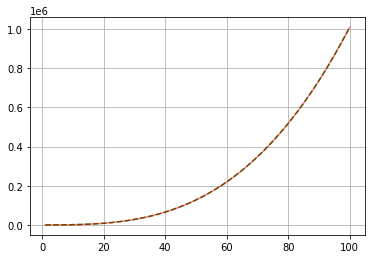

In [95]:
from scipy.integrate import quad
from math import log
import numpy as np
from functools import lru_cache
import matplotlib.pyplot as plt


def pow_f(deg):
    return lambda x: x**deg

fi = [lambda x: 1, log, pow_f(-2), pow_f(-1), pow_f(1), pow_f(2), pow_f(3)]
teta = [lambda x: 1, pow_f(1), pow_f(1/2), pow_f(2), pow_f(3), pow_f(4), pow_f(6)]


# @lru_cache(None)
def get_nearest(a, x_l, x_r):
    def multiply(f, g):
        return lambda x: f(x) * g(x)
    # хотим, чтобы градиент интеграла (sum(a_i * fi_i) - sum(b_i * teta_i))^2 dx был нулем => СЛАУ
    B = np.array([
        sum([quad(multiply(teta_f, multiply(lambda x: a_i, fi_f)), x_l, x_r)[0] for a_i, fi_f in zip(a, fi)])
        for teta_f in teta
    ])
    A = np.array([
        [quad(multiply(f, g), x_l, x_r)[0] for g in teta]
        for f in teta
    ])

    result = np.linalg.solve(A, B)
    return result


def calc_f(a, x):
    return sum([a_i * fi_i(x) for a_i, fi_i in zip(a, fi)])

def calc_g(b, x):
    return sum([b_i * teta_i(x) for b_i, teta_i in zip(b, teta)])


X_L, X_R = 1, 100
a = tuple([1] * 7)
b = get_nearest(a, X_L, X_R)

grid = list(np.linspace(X_L, X_R, 1000))
f_vals = np.array([calc_f(a, x) for x in grid])
g_vals = np.array([calc_g(b, x) for x in grid])
plt.plot(grid, f_vals, color='green', alpha=1, linestyle='dashed')
plt.plot(grid, g_vals, color='red', alpha=0.5, linestyle='solid')
plt.grid(True)

### Разница между значениями

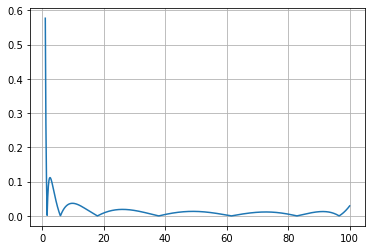

In [96]:
plt.plot(grid, np.abs(f_vals - g_vals))
plt.grid(True)